# Exploratory Data Analysis with Simple ML Models
This notebook demonstrates how simple machine learning models can be used as *exploratory tools* to assess data structure and quality.

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## 1. Load and Inspect the Data

In [17]:
iris = load_iris(as_frame=True)
df = iris.frame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
new_df = df.drop(columns='target') 

#Never use in place = True since you want a new DataFrame if you place inplace=True the new df is just none


#inplace=True argument means that the operation will modify the original DataFrame df directly, 
#instead of returning a new DataFrame with the changes.
#that is why I now create a new_df which has column target excluded because I don't want to overwrite the original df


In [19]:
new_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/Users/hassanhaydar/DSA103/EDA-lectures-7-8/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/hassanhaydar/DSA103/EDA-lectures-7-8/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/hassanhaydar/DSA103/EDA-lectures-7-8/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/hassanhaydar/DSA103/EDA-lectures-7-8/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/hassanhaydar/DSA103/EDA-lectures-7-8/.venv/lib/python3.13/site-pa

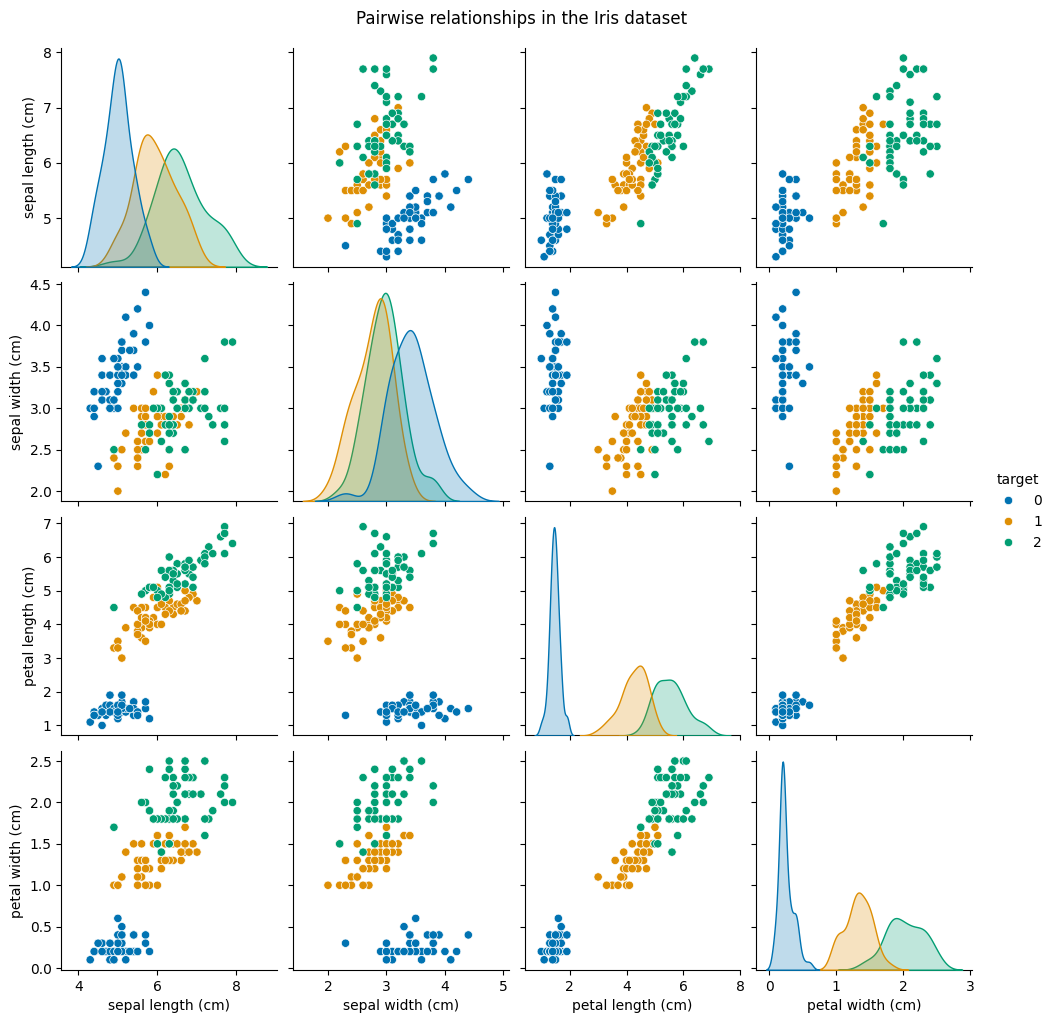

In [23]:
custom_palette = sns.color_palette("colorblind")
sns.pairplot(df, hue='target',palette= custom_palette, diag_kind='kde')
plt.suptitle("Pairwise relationships in the Iris dataset", y=1.02)
plt.show()

## 2. Recap Dimensionality Reduction (PCA)

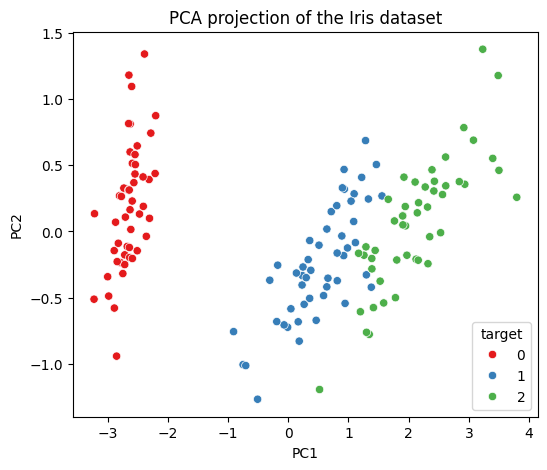

PC1 (92.5% variance)
PC2 (5.3% variance)


In [24]:
X = df[iris.feature_names]
y = df['target']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.title("PCA projection of the Iris dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
print(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")

## 3. Using Simple ML Models as EDA Tools

Pseudorandom split the data in training data and test data for evaluating the prediction. The stratify parameter ensures that the targets are evenly represented in the split data sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y) #this train_test_split code will take 30% of our data and make it a test set so 
#this applies when we don't want to take every info in our data just to make a test if something is reasonable to do 

### a) Logistic Regression

Is a regression model suitable for a classification problem?

In [26]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

print("Train accuracy:", logreg.score(X_train, y_train))
print("Test accuracy:", logreg.score(X_test, y_test))  #this does all the regression calculation automatically 

Train accuracy: 0.9714285714285714
Test accuracy: 0.9333333333333333


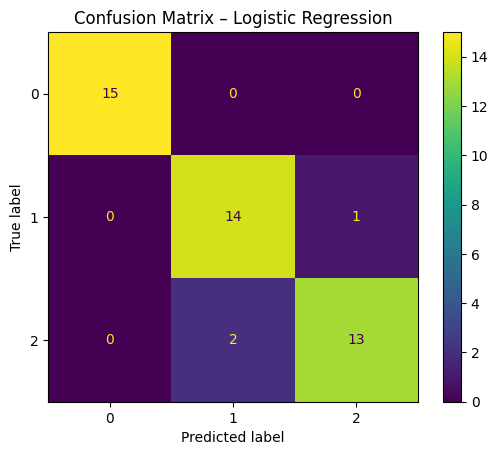

In [27]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Confusion Matrix – Logistic Regression")
plt.show() #on the diagona we have the true cases 

### b) Decision Tree Classifier

Train accuracy: 0.9809523809523809
Test accuracy: 0.9777777777777777


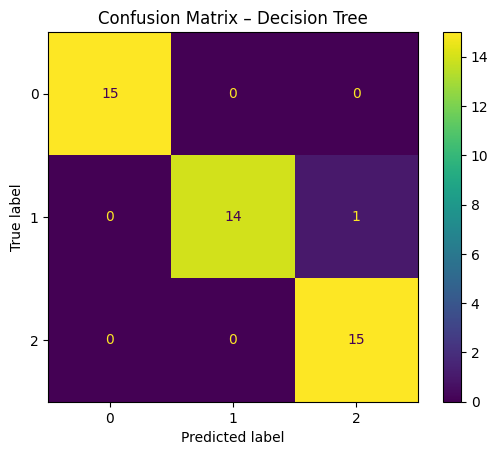

In [28]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

print("Train accuracy:", tree.score(X_train, y_train))
print("Test accuracy:", tree.score(X_test, y_test))

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
plt.title("Confusion Matrix – Decision Tree")
plt.show()

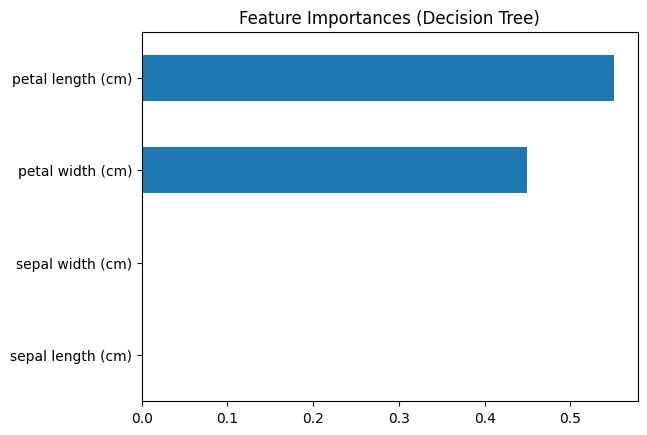

In [29]:
feat_importances = pd.Series(tree.feature_importances_, index=iris.feature_names)
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances (Decision Tree)")
plt.show()

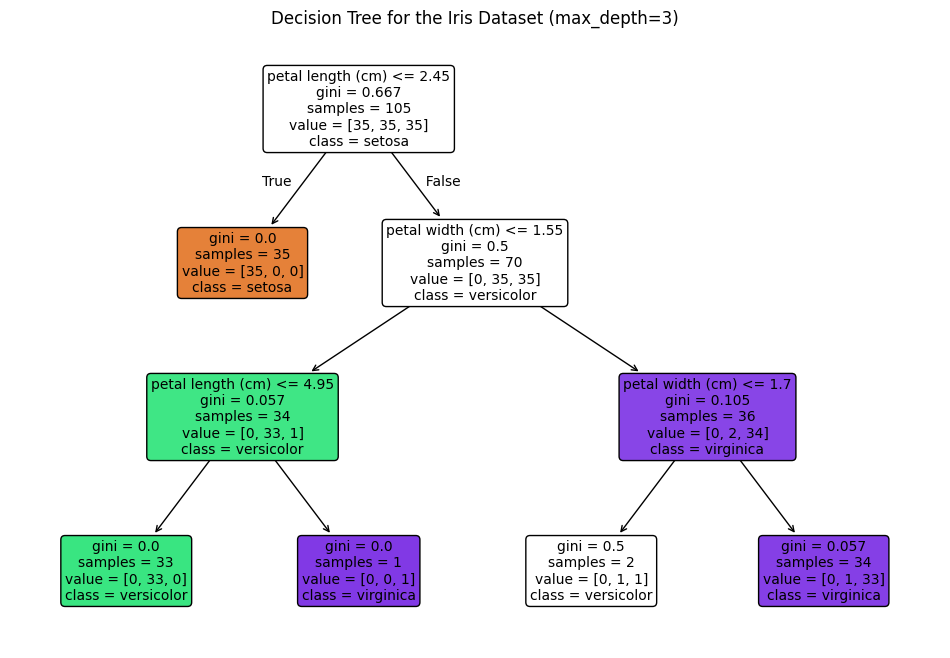

In [30]:
plt.figure(figsize=(12,8))
plot_tree(
    tree,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for the Iris Dataset (max_depth=3)")
plt.show()

## 4. Quick Model Diagnostics

Testing generalisation by cross validation

In [31]:
cv_scores = cross_val_score(tree, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.93333333 1.         1.        ]
Mean accuracy: 0.9733333333333334


In [32]:
X_pca_full = PCA(n_components=2).fit_transform(X)
tree.fit(X_pca_full, y)
print("Decision Tree accuracy on 2D PCA features:", cross_val_score(tree, X_pca_full, y, cv=5).mean())

Decision Tree accuracy on 2D PCA features: 0.9133333333333334


## 5. Wrap-Up & Reflection

In [33]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree (depth=3)"],
    "Train Accuracy": [logreg.score(X_train, y_train), tree.score(X_train, y_train)],
    "Test Accuracy": [logreg.score(X_test, y_test), tree.score(X_test, y_test)]
})
summary

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.971429,0.933333
1,Decision Tree (depth=3),0.980952,0.977778


What can we take away from this?

In [1]:
"""
wine_eda_solution.py
--------------------

Solution for Wine dataset EDA + simple classification models

Goals:
1. Load and inspect the data
2. Perform exploratory analysis and visualizations
3. Apply PCA
4. Classification and evaluation
"""

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Main analysis function
def main():
    # --- 1. Load data ---
    print("Loading dataset...")
    wine = load_wine()
    df = pd.DataFrame(wine.data, columns=wine.feature_names)
    df["target"] = wine.target

    print("\nData loaded successfully.")
    print(f"Shape: {df.shape}")
    print("\nFirst five rows:")
    print(df.head(), "\n")

    # 2. Basic exploration
    print("Info on dataset:")
    print(df.info(), "\n")
    
    print("Summary statistics:")
    print(df.describe(), "\n")

    print("Class distribution:")
    print(df["target"].value_counts(), "\n")

    print("Missing values:")
    print(df.isna().sum(), "\n")


    # set display options so that the print-statement is not truncated
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    # Mean of features per target
    print("\nMean feature values per target:")
    print(df.groupby('target').mean())

    # Std.dev. of features per target
    print("\nStdandard deviation for feature values per target:")
    print(df.groupby('target').std())

    # variance of features per target
    print("\nVariance of feature values per target:")
    print(df.groupby('target').var())


In [ ]:

    # 3. Correlation analysis
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap - Wine Dataset")
    plt.tight_layout()
    plt.savefig("heatmap.png")
    plt.close()
    print("Saved heatmap.png")


## PCA alone exercise

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [7]:
print("Loading dataset...")
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

Loading dataset...


In [28]:
df.shape

(178, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [23]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [19]:
df.duplicated().sum() #checks if there are any duplicates in df

np.int64(0)

In [20]:
df.isna().sum() #check if there is NaN in whole df

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [21]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [24]:
#and now since I inspected the whole df with no changes to apply or missing numbers I can continue with my analysis

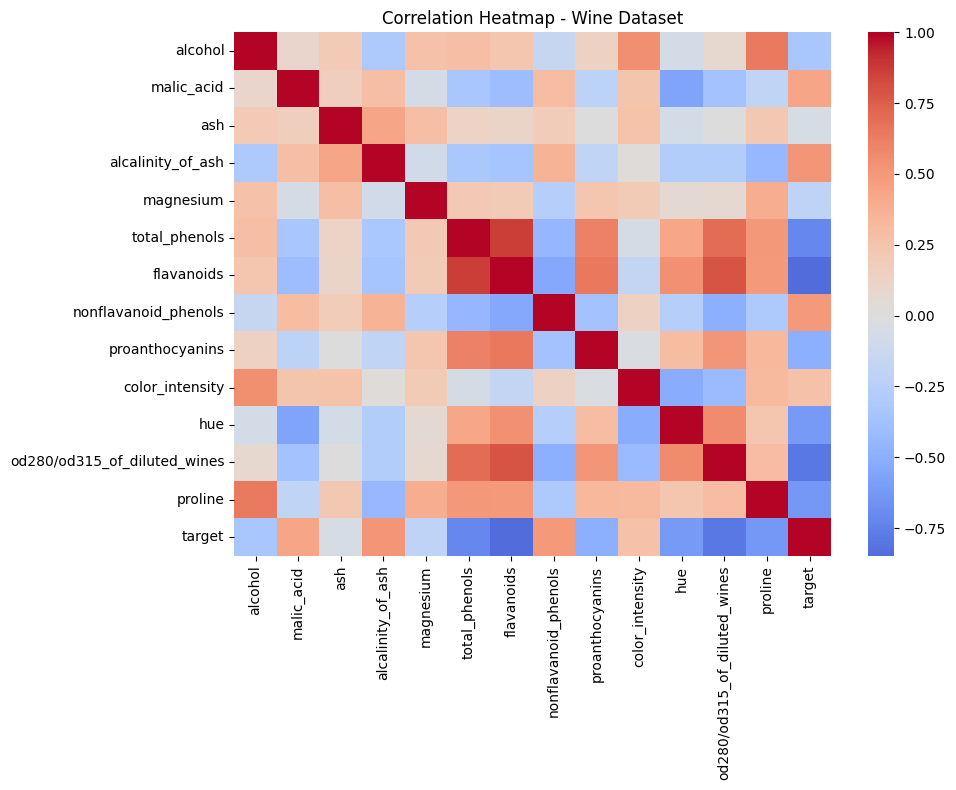

In [26]:
# 3. Correlation analysis using a heat map
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Wine Dataset")
plt.tight_layout()

In [ ]:
#here we can see there is a direct correlation between the target and alcohol

In [33]:
df["target"].nunique() #here we checked that the target which is number of categories or types of wine present here are 3 different classe

3

In [34]:
# the next thing to do is we can group by the target column with each mean of the features present

In [29]:
# set display options so that the print-statement is not truncated
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Mean of features per target
print("\nMean feature values per target:")
print(df.groupby('target').mean())


Mean feature values per target:
          alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
target                                                                   
0       13.744746    2.010678  2.455593          17.037288  106.338983   
1       12.278732    1.932676  2.244789          20.238028   94.549296   
2       13.153750    3.333750  2.437083          21.416667   99.312500   

        total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
target                                                                     
0            2.840169    2.982373              0.290000         1.899322   
1            2.258873    2.080845              0.363662         1.630282   
2            1.678750    0.781458              0.447500         1.153542   

        color_intensity       hue  od280/od315_of_diluted_wines      proline  
target                                                                        
0              5.528305  1.062034                      3.

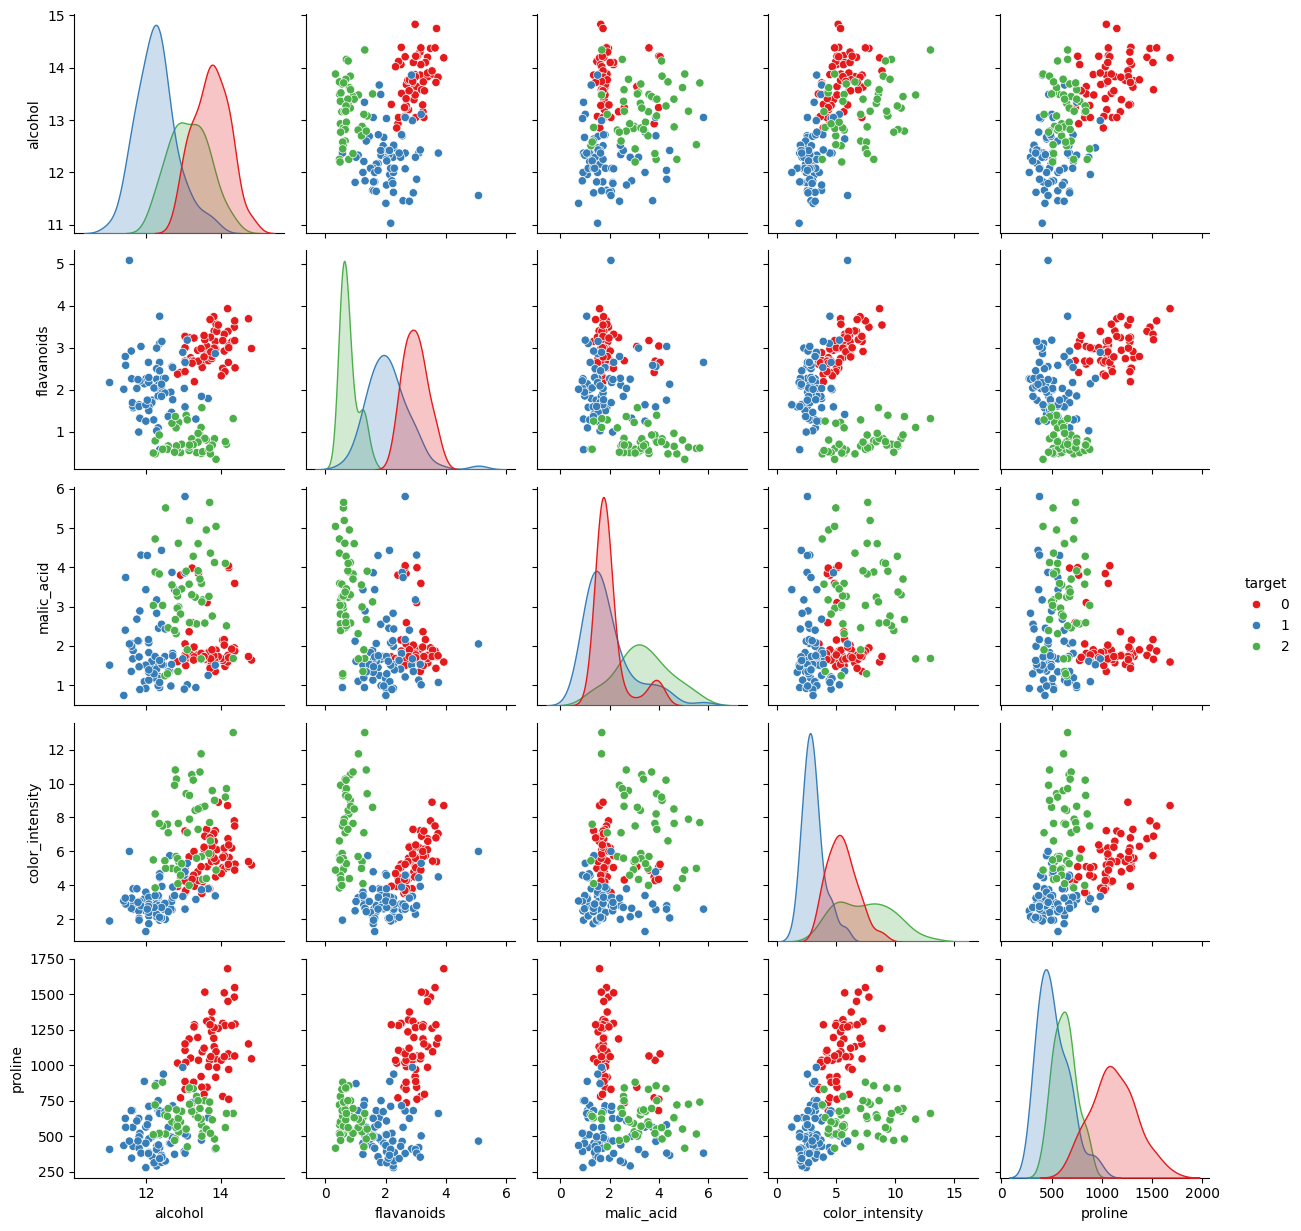

In [36]:
# 4. Visualizations
selected_features = ["alcohol", "flavanoids", "malic_acid", "color_intensity", "proline"]
sns.pairplot(df, vars=selected_features, hue="target", palette="Set1")

plt.show()



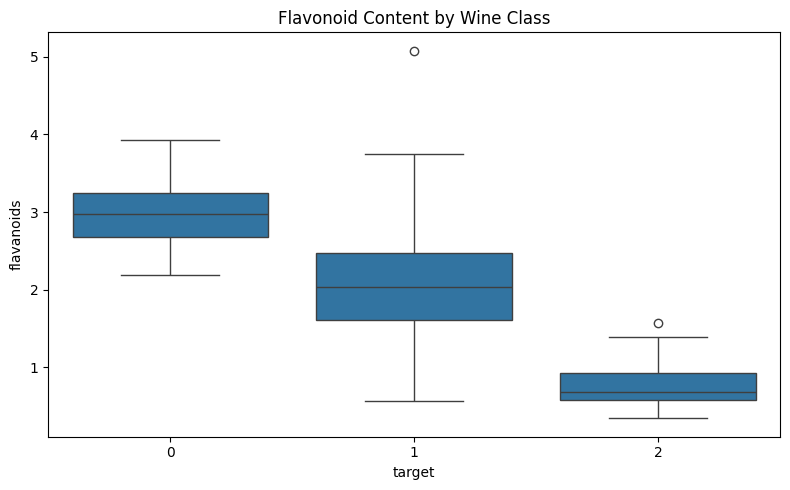

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="target", y="flavanoids", data=df)
plt.title("Flavonoid Content by Wine Class")
plt.tight_layout()



Explained variance ratio (PCA):
[0.36198848 0.1920749 ]
Cumulative variance explained: 0.554



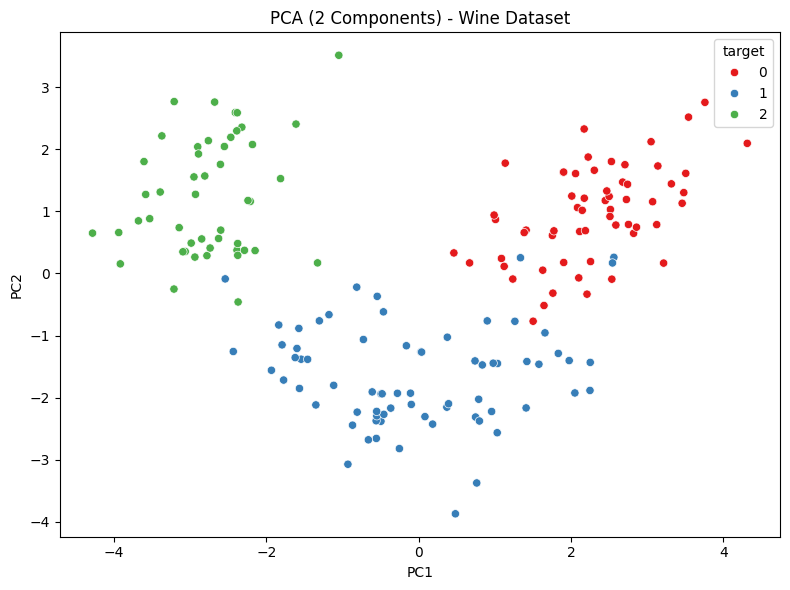

In [43]:
# 5. Scaling and PCA
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"]) # here in this step PCA happens where the pc1 and pc2 axis are calculated after the scaling
pca_df["target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="target", data=pca_df, palette="Set1")
plt.title("PCA (2 Components) - Wine Dataset")
plt.tight_layout()

print("\nExplained variance ratio (PCA):")
print(pca.explained_variance_ratio_)
print(f"Cumulative variance explained: {pca.explained_variance_ratio_.sum():.3f}\n")


In [40]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     178 non-null    float64
 1   PC2     178 non-null    float64
 2   target  178 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [41]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283]])

In [44]:
pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=['PC1', 'PC2']
)
#here we see the weighting for pca not in exercises just for my personal use

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903


In [46]:
 # 6. Classification on original data
print("--------------------------------------------")
print("Classification models on original data.\n")
X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

# Logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

    # acc = accuracy_score(y_test, y_pred)
    # print(f"Logistic Regression - model accuracy: {acc:.3f}\n")
print("Logistic Regression - train accuracy:", logreg.score(X_train, y_train))
print("Logistic Regression - test accuracy:", logreg.score(X_test, y_test))

print("Logistic Regression - confusion matrix:")
print(confusion_matrix(y_test, y_pred), "\n")

    # print("Logistic regression - classification report:") # just another report to get some stats on the model
    # print(classification_report(y_test, y_pred))


--------------------------------------------
Classification models on original data.

Logistic Regression - train accuracy: 1.0
Logistic Regression - test accuracy: 1.0
Logistic Regression - confusion matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]] 



## Decision Tree is not the best here to use in this specific case because there are no direct correlations unlike the iris data set 

In [ ]:
# Decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


print("Decision Tree - PC train accuracy:", tree.score(X_train, y_train))
print("Decision Tree - PC test accuracy:", tree.score(X_test, y_test))
print("Decision Tree - PC confusion matrix:")
print(confusion_matrix(y_test, y_pred), "\n")

    # Random forest
rf = RandomForestClassifier(
n_estimators=100,      # number of trees in the forest
max_depth=None,        # let the trees expand fully
random_state=42,       # for reproducibility
    )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Classifier - PC training accuracy:", rf.score(X_train, y_train))
print("Random Forest Classifier - PC test accuracy:", rf.score(X_test, y_test))
print("Random Forest Classifier - PC confusion matrix:")
print(confusion_matrix(y_test, y_pred), "\n")


Decision Tree - PC train accuracy: 0.9929577464788732
Decision Tree - PC test accuracy: 0.9444444444444444
Decision Tree - PC confusion matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]] 

Random Forest Classifier - PC training accuracy: 1.0
Random Forest Classifier - PC test accuracy: 1.0
Random Forest Classifier - PC confusion matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]] 


Analysis complete. Figures saved to current working directory.
